# Basic Example - Robust PCA

*Review Date: 05-08-2018

* Reviewed functions and behavior over sunspot time series.
* Nextflix Tests


In this notebook I only make test of Robust PCA.

In [1]:
%matplotlib inline

In [2]:
%cd ..

/home/dlegorreta/Documentos/RAD


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
plt.rcParams['figure.figsize'] = 15, 10

In [6]:
#Sunspot Data
sunspots=pd.read_table("../RAD/data/sunspots.txt",header=None)

In [7]:
sunspots.columns=['Index','Values']
sunspots.head()

,Index,Values
0,0,58.0
1,1,62.6
2,2,70.0
3,3,55.7
4,4,85.0


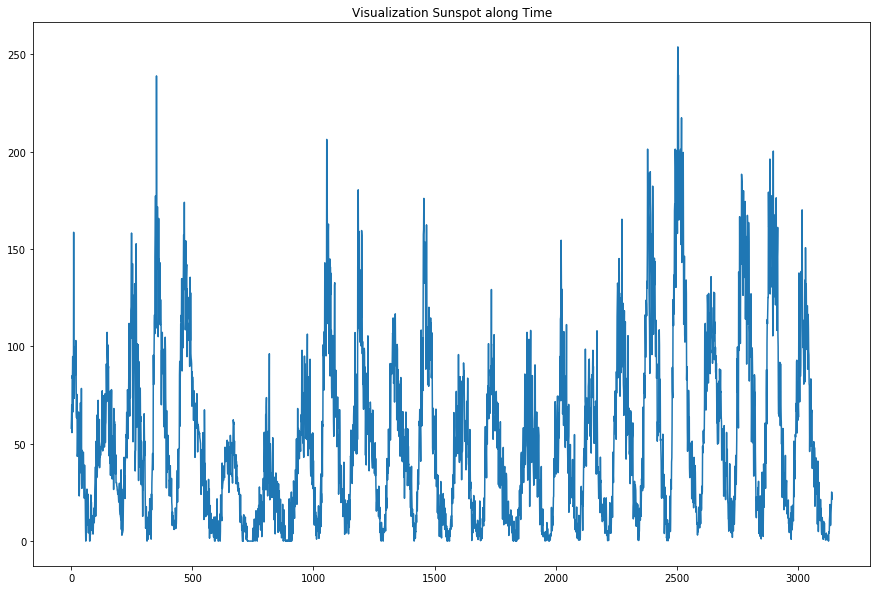

In [8]:
sunspots.Values.plot(title='Visualization Sunspot along Time')

In [9]:
#Main Function
from models import anomaly_detection as ad

In [10]:
# Algorithm over Time Series Data
Mod1=ad.AnomalyDetection_RPCA(autodiff=True,scale = True,verbose=True).fit(X=sunspots.Values)

..........Start Process..........
Time Series, frequency=7 and Num Periods= 449.
Value obj_prev 28.0312325808 and tol 0.0000000028
Objective function: 28.03123258  on previous iteration 0 
Objective function: 2959.68579660  on iteration 1 
Objective function: 2959.68579660  on previous iteration 1 
Objective function: 2346.85975226  on iteration 2 
Objective function: 2346.85975226  on previous iteration 2 
Objective function: 2255.27717391  on iteration 3 
Objective function: 2255.27717391  on previous iteration 3 
Objective function: 2233.08056955  on iteration 4 
Objective function: 2233.08056955  on previous iteration 4 
Objective function: 2225.68082208  on iteration 5 
Objective function: 2225.68082208  on previous iteration 5 
Objective function: 2223.33206939  on iteration 6 
Objective function: 2223.33206939  on previous iteration 6 
Objective function: 2222.63512604  on iteration 7 
Objective function: 2222.63512604  on previous iteration 7 
Objective function: 2222.45672632 

In [11]:
#Outputs from functions
Mod1.to_frame().head()

,X_original,X_transform,L_transform,S_transform,E_transform,MAD_Outlier
0,58.0,58.0,73.616938,0.0,-15.616938,0
1,62.6,62.6,40.522123,0.0,22.077877,0
2,70.0,70.0,46.145258,0.0,23.854742,0
3,55.7,55.7,48.265833,0.0,7.434167,0
4,85.0,85.0,53.791311,0.0,31.208689,0


In [12]:
L=Mod1.to_frame()

In [13]:
L.head()

,X_original,X_transform,L_transform,S_transform,E_transform,MAD_Outlier
0,58.0,58.0,73.616938,0.0,-15.616938,0
1,62.6,62.6,40.522123,0.0,22.077877,0
2,70.0,70.0,46.145258,0.0,23.854742,0
3,55.7,55.7,48.265833,0.0,7.434167,0
4,85.0,85.0,53.791311,0.0,31.208689,0


Text(0.5, 1.0, 'Outcomes Visualization')

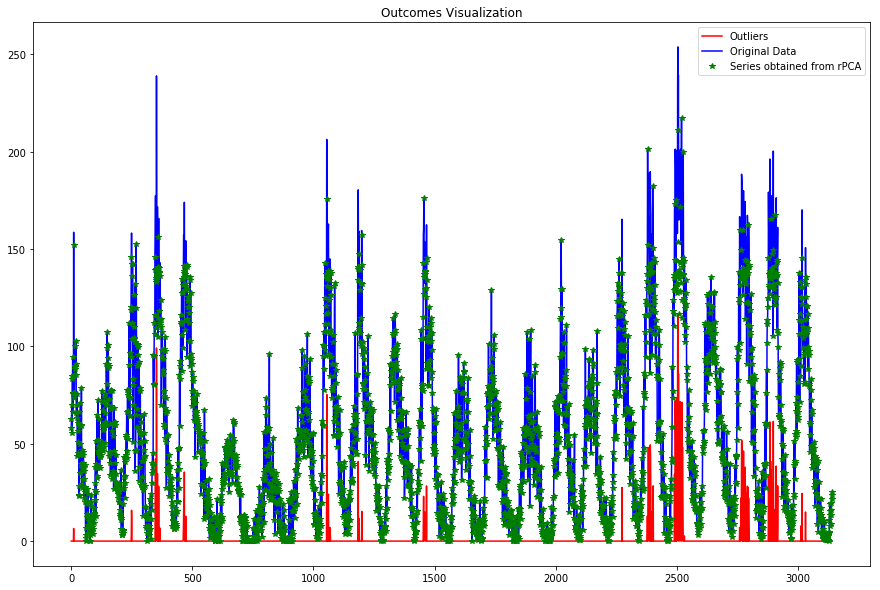

In [14]:
# Plot of the Outliers 

Outliers,=plt.plot(range(len(L.S_transform)),np.abs(L.S_transform), c='red',label='Outliers')# Outliers detectados
DataOriginal,=plt.plot(range(len(L.S_transform)),L.X_original,'blue',label='Original Data')
RPCData,=plt.plot(range(len(L.S_transform)),L.L_transform+L.E_transform,'g*',label='Series obtained from rPCA')


plt.legend(handles=[Outliers,DataOriginal,RPCData])
plt.title("Outcomes Visualization")

In [15]:
print("There are %d outliers of the total %d  observations."%(Mod1.num_outliers(),sunspots.shape[0]))

There are 140 outliers of the total 3143  observations.


## Test de Netflix

Reference of Original Test: https://github.com/Netflix/Surus/tree/master/resources/R/RAD/tests

In [16]:
#Summary of outcomes
def Plot_Outliers(DF):
    Outliers,=plt.plot(range(len(DF.S_transform)),np.abs(DF.S_transform), c='red',label='Outliers')# Outliers detectados
    DataOriginal,=plt.plot(range(len(DF.S_transform)),DF.X_original,'blue',label='Original Data')
    RPCData,=plt.plot(range(len(DF.S_transform)),DF.L_transform,'g*',label='Series obtained from rPCA')
    plt.legend(handles=[Outliers,DataOriginal,RPCData])
    plt.title("Outcomes Visualization")

In [17]:
#Serie Test 1 :signal with weekly periodicity.

Serie_Test1=np.sin((2*np.pi)/7*np.array(range(1,71)))

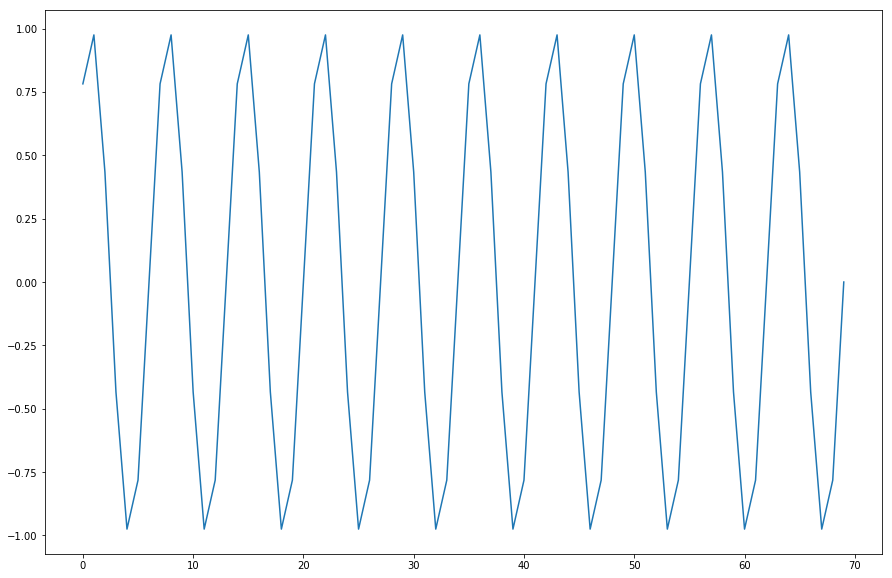

In [18]:
plt.plot(range(len(Serie_Test1)),Serie_Test1)

In [19]:
#Outliers days: 58,59 and 60.
Serie_Test1[58:61]=100

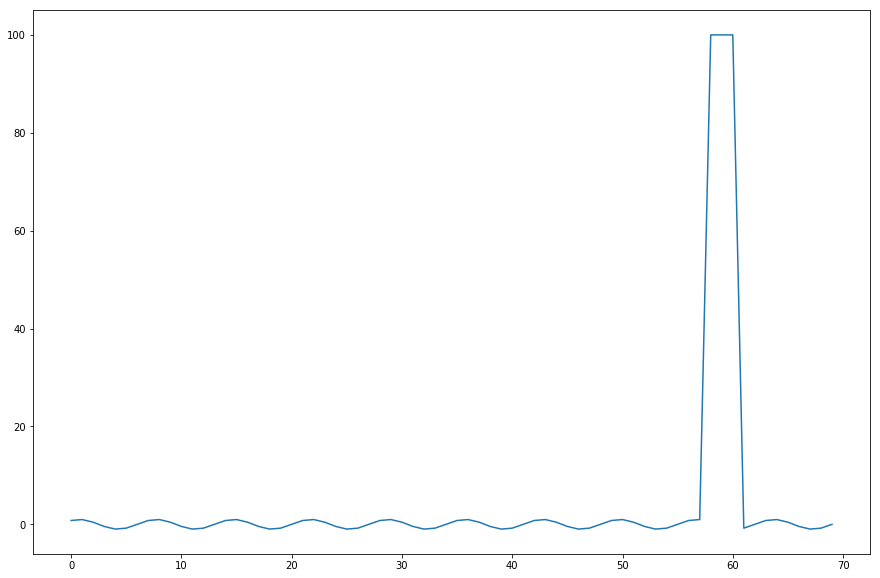

In [20]:
plt.plot(range(len(Serie_Test1)),Serie_Test1)

In [21]:
Mod2=ad.AnomalyDetection_RPCA(verbose=False,autodiff=False).fit(X=pd.Series(Serie_Test1))

Value obj_prev 4.1833001327 and tol 0.0000000004
Converged within 79 iterations


In [22]:
Mod2.to_frame().head()

,X_original,X_transform,L_transform,S_transform,E_transform,MAD_Outlier
0,0.781831,0.781831,4.299642,-3.507558,-0.010252,0
1,0.974928,0.974928,4.299642,-3.314462,-0.010252,0
2,0.433884,0.433884,4.299642,-3.855506,-0.010252,0
3,-0.433884,-0.433884,4.299642,-4.723274,-0.010252,0
4,-0.974928,-0.974928,4.299642,-5.264318,-0.010252,0


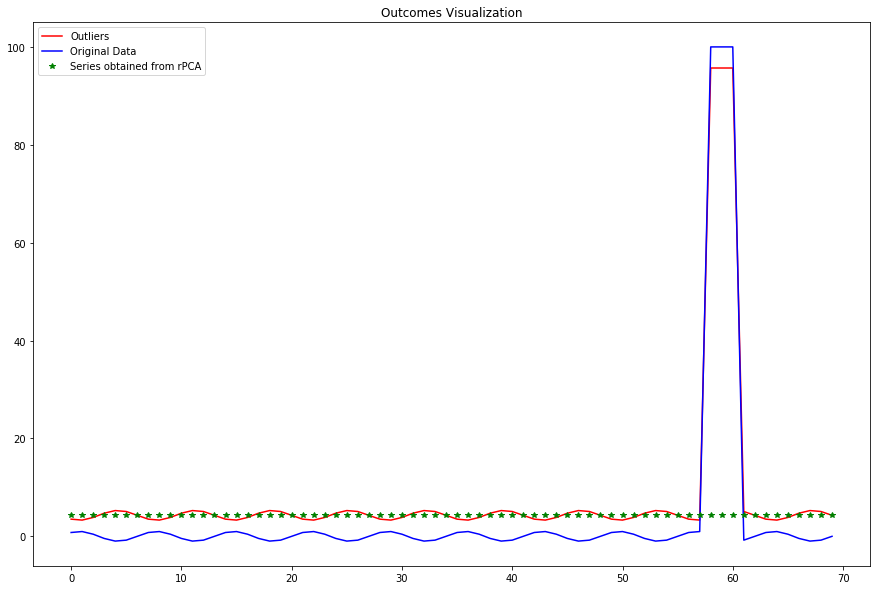

In [23]:
L1=Mod2.to_frame()
Plot_Outliers(L1)

## Test 2

Signal with weekly periodicity. There is a consistent increasing linear trend. An anomaly occurs on on days 69 and 70.

In [24]:
Serie_Test2=Serie_Test1+np.array(range(1,71))+np.random.rand(1,70)

In [25]:
Serie_Test2=Serie_Test2.reshape(-1,1).ravel()

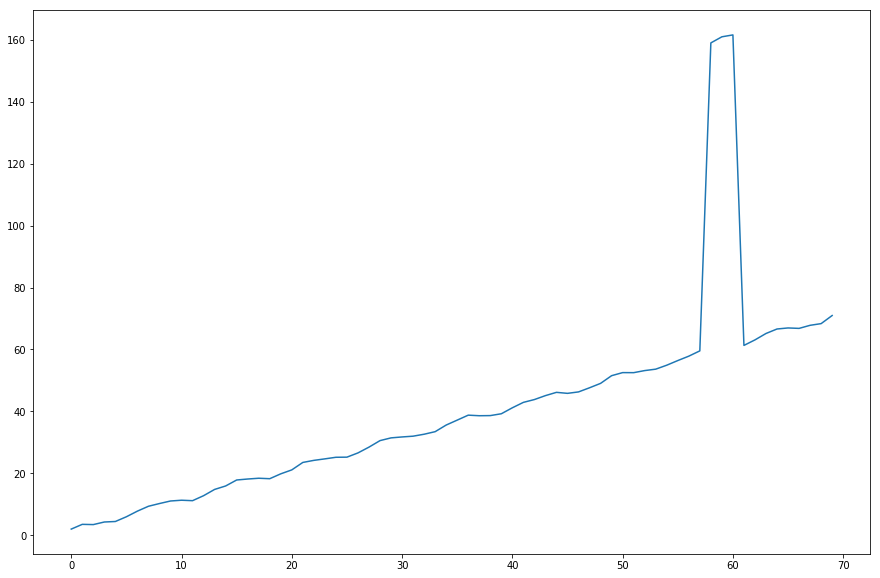

In [26]:
plt.plot(range(len(Serie_Test2)),Serie_Test2)

In [27]:
Mod2=ad.AnomalyDetection_RPCA(verbose=True).fit(X=pd.Series(Serie_Test2))

..........Start Process..........
Time Series, frequency=7 and Num Periods= 10.
Value obj_prev 4.1833001327 and tol 0.0000000004
Objective function: 4.18330013  on previous iteration 0 
Objective function: 8.25814348  on iteration 1 
Objective function: 8.25814348  on previous iteration 1 
Objective function: 3.63576346  on iteration 2 
Objective function: 3.63576346  on previous iteration 2 
Objective function: 1.96113702  on iteration 3 
Objective function: 1.96113702  on previous iteration 3 
Objective function: 1.53938036  on iteration 4 
Objective function: 1.53938036  on previous iteration 4 
Objective function: 1.46568635  on iteration 5 
Objective function: 1.46568635  on previous iteration 5 
Objective function: 1.45453798  on iteration 6 
Objective function: 1.45453798  on previous iteration 6 
Objective function: 1.45289871  on iteration 7 
Objective function: 1.45289871  on previous iteration 7 
Objective function: 1.45265872  on iteration 8 
Objective function: 1.45265872 

In [28]:
Mod2.to_frame().head()

,X_original,X_transform,L_transform,S_transform,E_transform,MAD_Outlier
0,2.002666,0.000000,0.985223,0.0,-0.985223,0
1,3.535719,1.533053,0.985223,0.0,0.547830,0
2,3.456468,-0.079250,0.985223,0.0,-1.064474,0
3,4.290748,0.834279,0.985223,0.0,-0.150944,0
4,4.453481,0.162733,0.985223,0.0,-0.822490,0


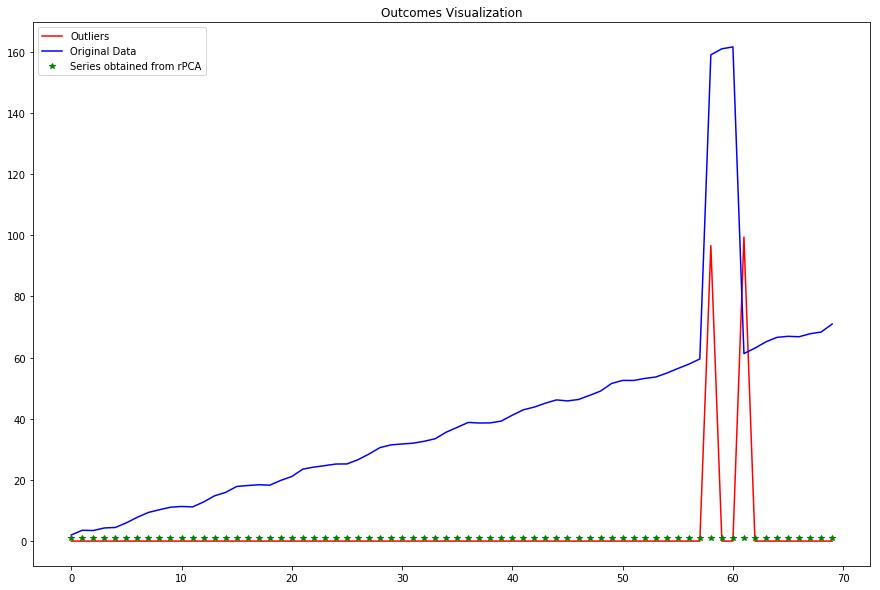

In [29]:
L2=Mod2.to_frame()
Plot_Outliers(L2)

## Test 3 
Signal with no periodicity. The signal is the cumulative sum of the cumulative sum of random noise. An anomaly occurs on days 50, 51, and 52.

In [30]:
Serie_Test3=np.cumsum(np.random.normal(1,1,size=70))

In [31]:
#Outliers Controlados
Serie_Test3[50:53]=100

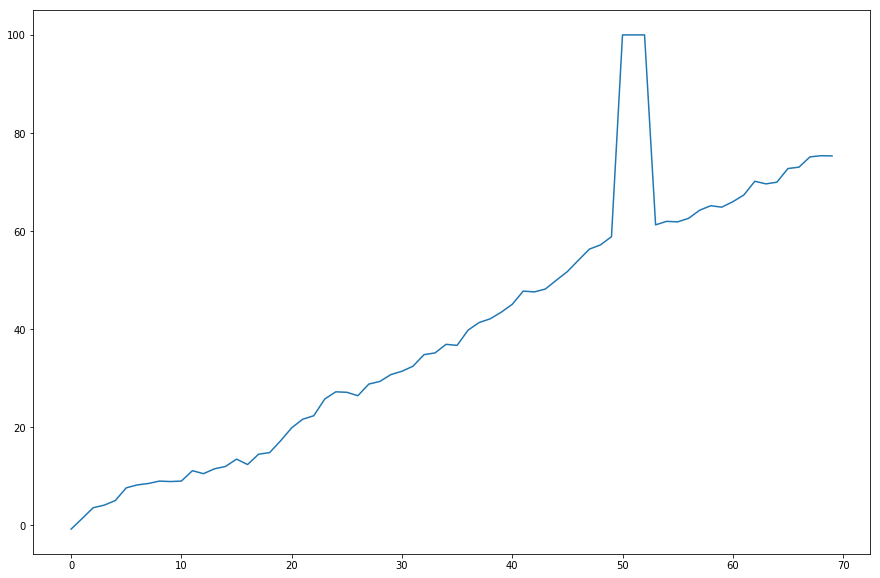

In [32]:
plt.plot(range(len(Serie_Test3)),Serie_Test3)

In [33]:
Mod2=ad.AnomalyDetection_RPCA(verbose=True).fit(X=pd.Series(Serie_Test3))

..........Start Process..........
Time Series, frequency=7 and Num Periods= 10.
Value obj_prev 4.1833001327 and tol 0.0000000004
Objective function: 4.18330013  on previous iteration 0 
Objective function: 8.36441989  on iteration 1 
Objective function: 8.36441989  on previous iteration 1 
Objective function: 5.44710006  on iteration 2 
Objective function: 5.44710006  on previous iteration 2 
Objective function: 4.85270168  on iteration 3 
Objective function: 4.85270168  on previous iteration 3 
Objective function: 4.75702751  on iteration 4 
Objective function: 4.75702751  on previous iteration 4 
Objective function: 4.74280972  on iteration 5 
Objective function: 4.74280972  on previous iteration 5 
Objective function: 4.74072497  on iteration 6 
Objective function: 4.74072497  on previous iteration 6 
Objective function: 4.74041990  on iteration 7 
Objective function: 4.74041990  on previous iteration 7 
Objective function: 4.74037527  on iteration 8 
Objective function: 4.74037527 

In [34]:
Mod2.to_frame().head()

,X_original,X_transform,L_transform,S_transform,E_transform,MAD_Outlier
0,-0.739436,0.000000,1.086806,0.0,-1.086806,0
1,1.415210,2.154645,1.086806,0.0,1.067839,0
2,3.616645,2.201435,1.086806,0.0,1.114629,0
3,4.138868,0.522224,1.086806,0.0,-0.564583,0
4,5.066715,0.927847,1.086806,0.0,-0.158959,0


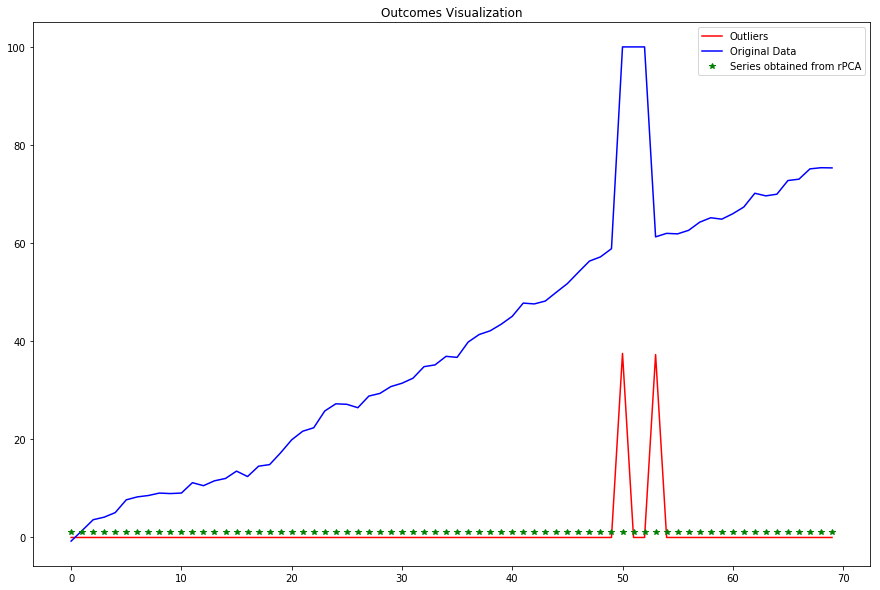

In [35]:
L3=Mod2.to_frame()
Plot_Outliers(L3)

## Test 4 

Similar to test 3.


In [36]:
#Data
Serie_Test4=np.cumsum(np.random.normal(5,5,size=70))

In [37]:
#Outliers 
Serie_Test4[50:53]=100

In [38]:
Mod2=ad.AnomalyDetection_RPCA(verbose=True).fit(X=pd.Series(Serie_Test4))

..........Start Process..........
Time Series, frequency=7 and Num Periods= 10.
Value obj_prev 4.1833001327 and tol 0.0000000004
Objective function: 4.18330013  on previous iteration 0 
Objective function: 8.24644210  on iteration 1 
Objective function: 8.24644210  on previous iteration 1 
Objective function: 5.16493431  on iteration 2 
Objective function: 5.16493431  on previous iteration 2 
Objective function: 4.50356199  on iteration 3 
Objective function: 4.50356199  on previous iteration 3 
Objective function: 4.36271128  on iteration 4 
Objective function: 4.36271128  on previous iteration 4 
Objective function: 4.33073450  on iteration 5 
Objective function: 4.33073450  on previous iteration 5 
Objective function: 4.32362987  on iteration 6 
Objective function: 4.32362987  on previous iteration 6 
Objective function: 4.32205917  on iteration 7 
Objective function: 4.32205917  on previous iteration 7 
Objective function: 4.32171230  on iteration 8 
Objective function: 4.32171230 

In [39]:
Mod2.to_frame().head()

,X_original,X_transform,L_transform,S_transform,E_transform,MAD_Outlier
0,8.419693,0.000000,5.489155,0.000000,-5.489155,0
1,16.961071,8.541377,5.489155,0.000000,3.052222,0
2,27.409060,10.447989,5.489155,0.000000,4.958834,0
3,34.614387,7.205328,5.489155,0.000000,1.716173,0
4,53.711802,19.097414,5.489155,1.956508,11.651751,1


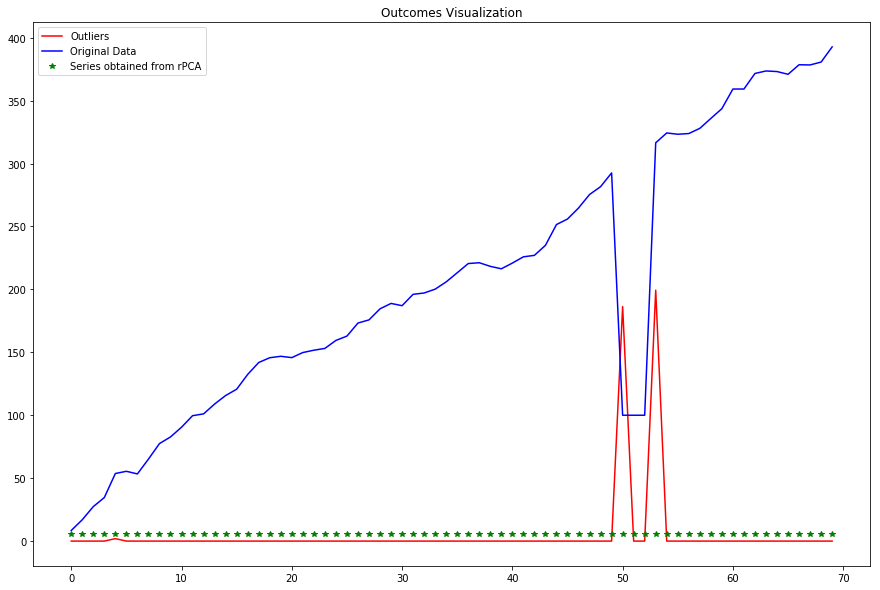

In [40]:
L4=Mod2.to_frame()
Plot_Outliers(L4)

## Test 5


Outliers in differentes period, similar to the test 1.

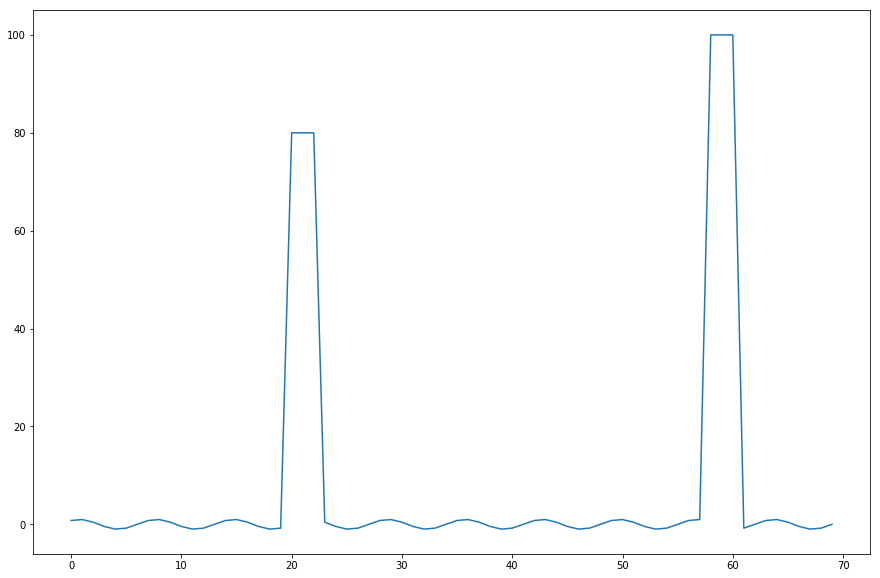

In [41]:
Serie_Test5=np.sin((2*np.pi)/7*np.array(range(1,71)))
#Outliers
Serie_Test5[58:61]=100
Serie_Test5[20:23]=80

plt.plot(range(len(Serie_Test5)),Serie_Test5)

In [42]:
Mod2=ad.AnomalyDetection_RPCA(verbose=True,autodiff=False).fit(X=pd.Series(Serie_Test5))
Mod2.to_frame().head()

..........Start Process..........
Time Series, frequency=7 and Num Periods= 10.
Value obj_prev 4.1833001327 and tol 0.0000000004
Objective function: 4.18330013  on previous iteration 0 
Objective function: 15.31564464  on iteration 1 
Objective function: 15.31564464  on previous iteration 1 
Objective function: 13.63404362  on iteration 2 
Objective function: 13.63404362  on previous iteration 2 
Objective function: 12.84290105  on iteration 3 
Objective function: 12.84290105  on previous iteration 3 
Objective function: 12.43831162  on iteration 4 
Objective function: 12.43831162  on previous iteration 4 
Objective function: 12.19764450  on iteration 5 
Objective function: 12.19764450  on previous iteration 5 
Objective function: 12.05064865  on iteration 6 
Objective function: 12.05064865  on previous iteration 6 
Objective function: 11.94523132  on iteration 7 
Objective function: 11.94523132  on previous iteration 7 
Objective function: 11.87040231  on iteration 8 
Objective functi

,X_original,X_transform,L_transform,S_transform,E_transform,MAD_Outlier
0,0.781831,0.781831,4.557928,0.0,-3.776096,0
1,0.974928,0.974928,7.314335,0.0,-6.339407,0
2,0.433884,0.433884,7.703117,0.0,-7.269233,0
3,-0.433884,-0.433884,7.703117,0.0,-8.137000,0
4,-0.974928,-0.974928,7.703117,0.0,-8.678045,0


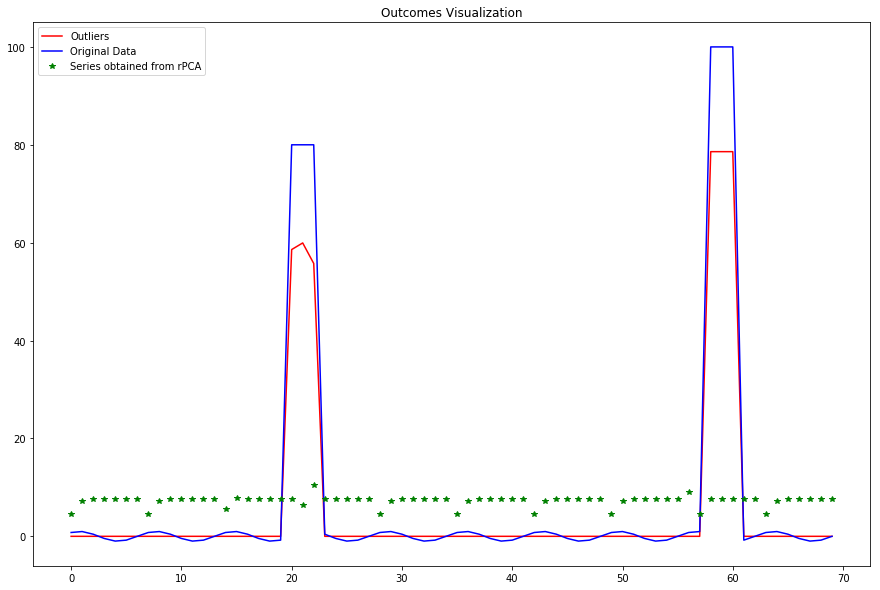

In [43]:
L5=Mod2.to_frame()
Plot_Outliers(L5)

## Test 6

Similar to the test 3 + Test 4 with outlier in differentes period.

Text(0.5, 1.0, 'Time Serie')

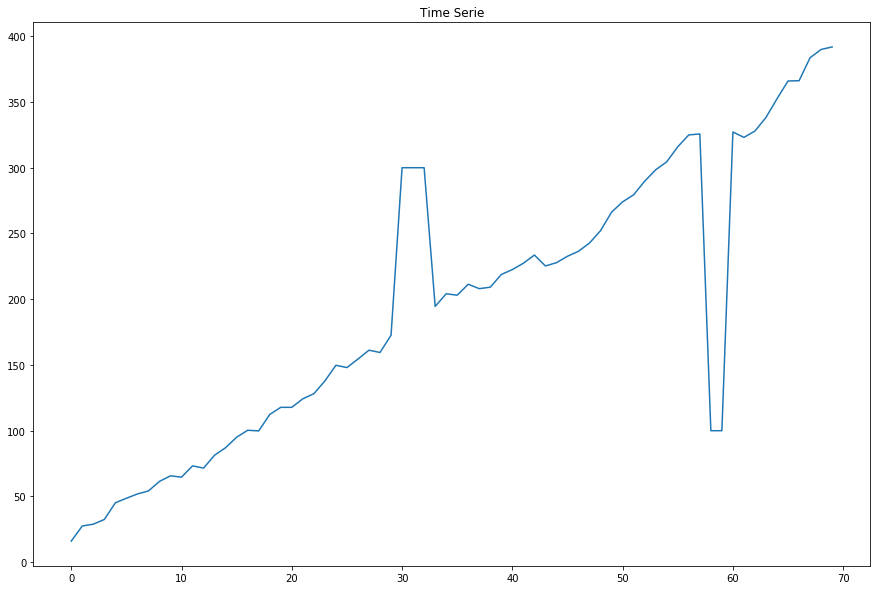

In [44]:
Serie_Test6=np.cumsum(np.random.normal(1,1,size=70)+np.random.normal(5,5,size=70))

#Outliers
Serie_Test6[58:60]=100
Serie_Test6[30:33]=300

plt.plot(range(len(Serie_Test6)),Serie_Test6)
plt.title("Time Serie")

In [45]:
Mod2=ad.AnomalyDetection_RPCA(verbose=True).fit(X=pd.Series(Serie_Test6))
Mod2.to_frame().head()

..........Start Process..........
Time Series, frequency=7 and Num Periods= 10.
Value obj_prev 4.1833001327 and tol 0.0000000004
Objective function: 4.18330013  on previous iteration 0 
Objective function: 11.77773729  on iteration 1 
Objective function: 11.77773729  on previous iteration 1 
Objective function: 7.69574870  on iteration 2 
Objective function: 7.69574870  on previous iteration 2 
Objective function: 6.03402263  on iteration 3 
Objective function: 6.03402263  on previous iteration 3 
Objective function: 5.39916315  on iteration 4 
Objective function: 5.39916315  on previous iteration 4 
Objective function: 5.19256150  on iteration 5 
Objective function: 5.19256150  on previous iteration 5 
Objective function: 5.13052577  on iteration 6 
Objective function: 5.13052577  on previous iteration 6 
Objective function: 5.10888825  on iteration 7 
Objective function: 5.10888825  on previous iteration 7 
Objective function: 5.10094513  on iteration 8 
Objective function: 5.1009451

,X_original,X_transform,L_transform,S_transform,E_transform,MAD_Outlier
0,16.047508,0.000000,5.368892,0.0,-5.368892,0
1,27.530935,11.483427,5.368892,0.0,6.114534,0
2,28.908806,1.377871,5.368892,0.0,-3.991021,0
3,32.480580,3.571773,5.368892,0.0,-1.797119,0
4,45.163690,12.683111,5.368892,0.0,7.314218,0


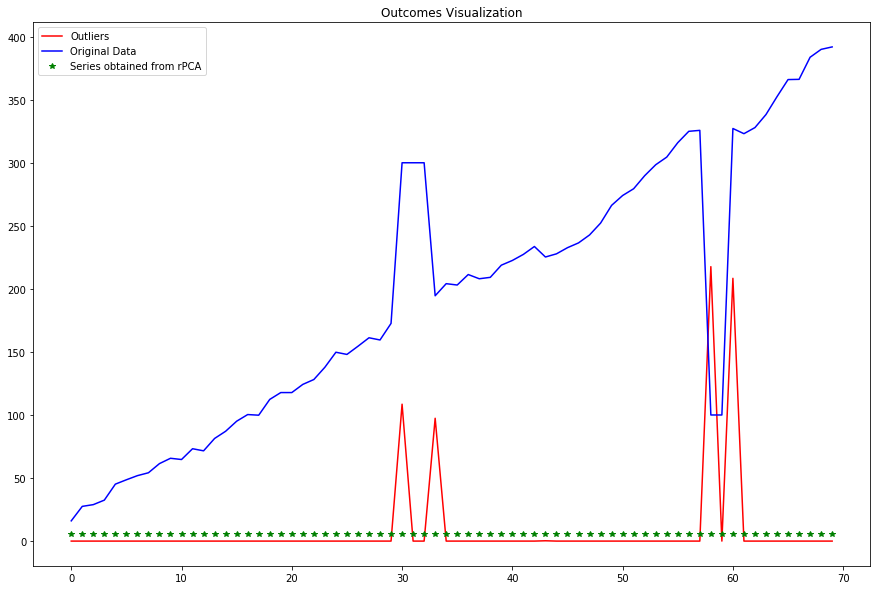

In [46]:
L6=Mod2.to_frame()
Plot_Outliers(L6)

## Test 7 

Similar to the test 6, but with long time serie.

Text(0.5, 1.0, 'Time Serie')

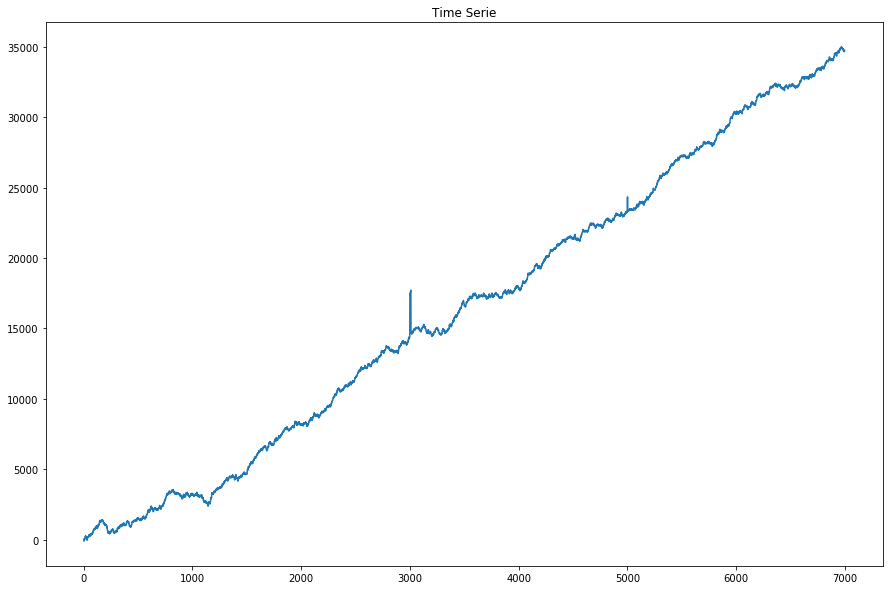

In [47]:
Serie_Test7=np.cumsum(np.random.normal(1,20,size=7000)+np.random.normal(5,35,size=7000))

#Outliers
Serie_Test7[5000:5003]=1000+Serie_Test7[5000:5003]
Serie_Test7[3000:3010]=3000+Serie_Test7[3000:3010]

plt.plot(range(len(Serie_Test7)),Serie_Test7)
plt.title("Time Serie")

In [48]:
%%time

Mod2=ad.AnomalyDetection_RPCA(verbose=False).fit(X=pd.Series(Serie_Test7))
#Mod2.to_frame().head()

Value obj_prev 41.8330013267 and tol 0.0000000042
Converged within 88 iterations
CPU times: user 11.2 s, sys: 1.43 s, total: 12.6 s
Wall time: 10.7 s


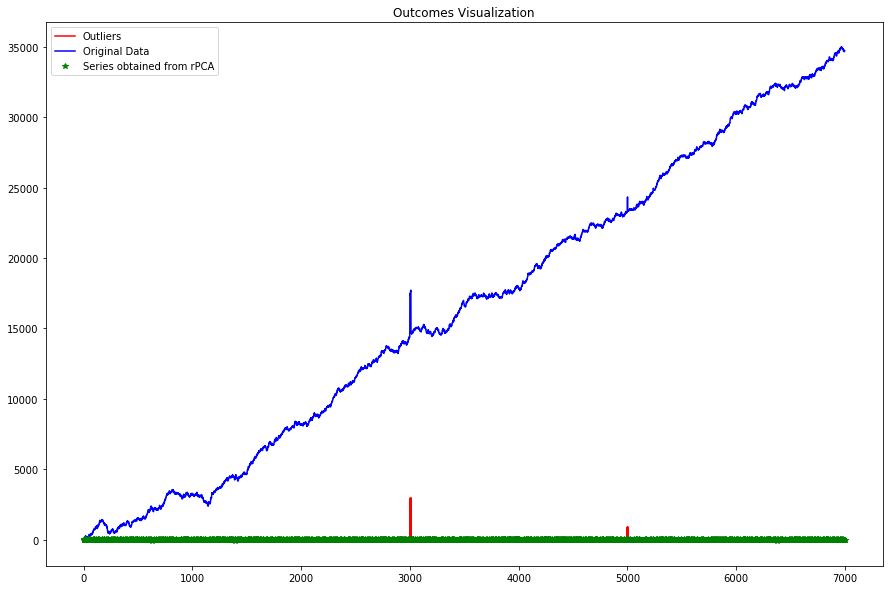

In [49]:
L6=Mod2.to_frame(add_mad=False)
Plot_Outliers(L6)